In [14]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

a) Sett opp en ligning som beskriver Helle sin budsjetbetingelse.

Der C = m + w * h og h = T-L

Vi vet at m = 100 og w = 2.5


T er antall arbeidstimer og helle kan ha totalt ha 7*12 = 84, dvs T = 84.

Nyttefunksjonen er gitt ved $ U = C^a*L^b $


Dersom lønna er 2.5 er budsjettbetingelsen slik:


310 - 2.5*L

Helningen på budsjettlinjen blir da:


-2.50000000000000

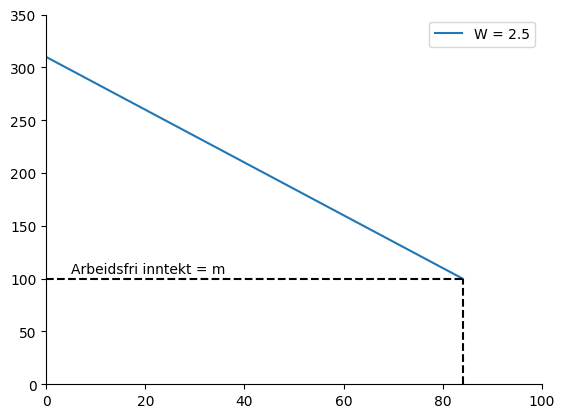

In [20]:
# definerer symboler jeg kan få bruk for. 
L,m,M,P,W,T = sp.symbols("L m M P W T")

L_0 = np.linspace(0.001,84,1000)
x = np.linspace(0.001,10,1000)

# Ligning som beskriver budsjett betingelsen: 

budsjett_ligning = sp.Eq(100+W*(84-L),c)

# Budsjettlinje (timelønn=2.5):

def budsjett(L):
    return 310-2.5*L

def create_ax():
    fig, ax = plt.subplots()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylim(0,350)
    ax.set_xlim(0,100)
    return fig, ax

fig, ax = create_ax()

ax.plot(L_0,budsjett(L_0),label = 'W = 2.5')
ax.legend(loc ='best')

# Arbeidsfri inntekt
ax.vlines(84,0,100, color='black',ls='dashed')
ax.hlines(100,0,84, color='black',ls='dashed')
ax.annotate('Arbeidsfri inntekt = m', (0+5,100+5))

print('Dersom lønna er 2.5 er budsjettbetingelsen slik:')
display(budsjettlinje)

der_budsjett = sp.diff(budsjettlinje,L)
print(f'Helningen på budsjettlinjen blir da:')
der_budsjett

b og c) Tegn en graf som viser helle sine preferanser og budsjettbetingelse. Identifiser helle sin reservasjonslønn grafisk.

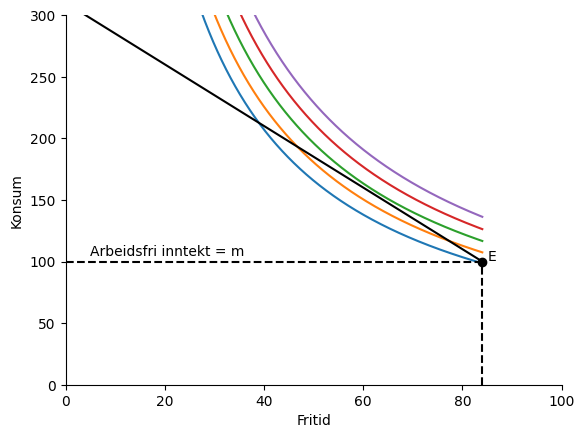

In [23]:
# tegne indifferenskurver for a= .5, b= .5

c,C,L,a,b,u,u_0,U= sp.symbols("c C L a b u u_0 U", real=True, positive=True)

u = C**a*L**b

def create_ax():
                fig, ax = plt.subplots()
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,300))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlabel('Fritid')
                ax.set_ylabel('Konsum')
                
                return fig, ax

fig, ax = create_ax()

# Løser med hensyn på L 
L_ind_sol=sp.solve(u-u_0,L)[0]
L_ind_sol

# Må gjøre om for å plotte 
indiff_L=sp.lambdify((u_0,a,b,C), L_ind_sol)
indiff_L(u_0,a,b,C)

for i in range (91, 111,4):
    ax.plot(L_0, indiff_L(i,0.5,0.5,L_0))
    
ax.plot(L_0,budsjett2(L_0), color = 'black')

ax.vlines(84,0,100, color='black',ls='dashed')
ax.hlines(100,0,84, color='black',ls='dashed')
ax.annotate('Arbeidsfri inntekt = m', (0+5,100+5));
ax.plot(84,100, marker  ='o', color= 'black')
ax.annotate('E',(84+1,100+1));

Reservasjonslønna er den laveste lønna individet er villig til å godta. Den laveste lønna vil gjøre individet indifferent mellom det å jobbe og det å ha 100% fri. En annen måte å si dette på er at det optimale valget er at lønna er lik helningen på indifferenskurven der C = M og L = T.

In [25]:
# Reservasjonslønn

U_L,U_C,A,W,r  = sp.symbols('U_L U_C A W r')

Reservasjonnslønn = sp.Eq(U_L/U_C,W**r)

print('reservasjonslønna er der:')
display(Reservasjonnslønn)
print('Gitt av punkt E.')


reservasjonslønna er der:


Eq(U_L/U_C, W**r)

Gitt av punkt E.


d) Identifiser Helle sitt optimale valg av konsum og fritd, gitt at timelønna er høyere enn
reservasjonslønna til Helle.

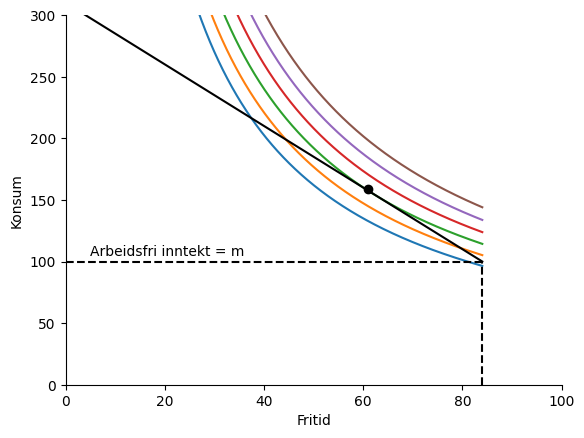

In [55]:

def create_ax():
                fig, ax = plt.subplots()
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,300))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                ax.set_xlabel('Fritid')
                ax.set_ylabel('Konsum')
                
                return fig, ax

fig, ax = create_ax()

for i in range (90, 114,4):
    ax.plot(L_0, indiff_L(i,0.5,0.5,L_0))
    
ax.plot(L_0,budsjett2(L_0), color = 'black')

ax.vlines(84,0,100, color='black',ls='dashed')
ax.hlines(100,0,84, color='black',ls='dashed')
ax.annotate('Arbeidsfri inntekt = m', (0+5,100+5));
ax.plot(61,159, marker = 'o', color = 'black');

Den optimale løsningen er der helningen på indifferens kurven er lik helningen på budsjettbetingelsen:
$ w = \frac{U_c}{U_l}$. Den økonomiske intusjonen for dette er at effekten av en reduskjon eller en økning mellom godene fritid og konsum i dette punktet tar hverandre ut fullstendig, individet kan ikke da endre sin kombinasjon av fritid eller konsum, og få en høyere nytte.

e) Hva skjer med helle sitt optimale valg av konsum og fritid dersom hun får tilbud om en
høyere timelønn? Identifiser inntekts- og substitusjonseffekten grafisk, og gi økonomisk
intuisjon av effektene.